# Gradient Descent

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
# defining the function h(x,y) we will be working with
def h(xx):
    x = xx[0]
    y = xx[1]
    return 100*(y-x*x)**2 + (1-x)**2

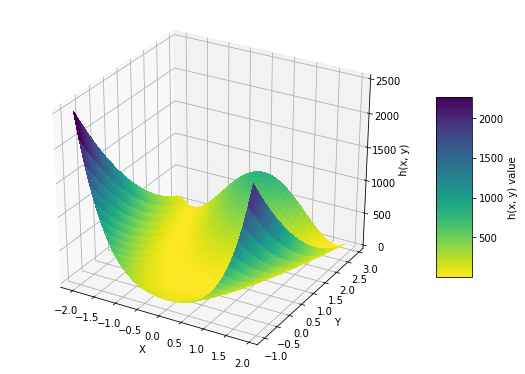

In [3]:
# 1. 3D-surface plot of h(x,y)
# plotting function h(x,y) for [−2≤𝑥≤2],[−1≤𝑦≤3]

fig = plt.figure(figsize=(7,5)) 
ax = Axes3D(fig)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z= h([X,Y])

surf = ax.plot_surface(X, Y, Z, cmap='viridis_r',
                      linewidth=0, antialiased=False)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("h(x, y)")

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label="h(x, y) value")
plt.show()

In [4]:
# Making all functions

# gradient of h
def gradient(X):
  x = X[0]
  y = X[1]
  dx = 100 * (-2 * x * 2 * (y - x ** 2)) - 2 * (1 - x)
  dy = 100 * (2 * (y - x ** 2))
  return np.array([dx, dy])

# distance of two vectors
def dist(X, Y):
  return np.linalg.norm(X - Y)

# calculating h-value
def hval(X):
  x = X[0]
  y = X[1]
  return 100*(y - x**2)**2 + (1 - x)**2

def gradient_descent(X_init, X_opt, eta, threshold, max_iteration):
  X = X_init
  i = 0
  X_vals = [X_init.tolist()] 
  H_vals = [hval(X_init).tolist()]
  # update point until max iteration exceeded or distance to minimum is less than threshold 
  while i < max_iteration and dist(X, X_opt) > threshold: 
    X -= eta * gradient(X)
    X_vals.append(X.tolist())
    hvalue = hval(X)

    # stopping condition to prevent overflow errors if the learning does not converge 
    if hvalue > 10 ** 100:
      break

    H_vals.append(hvalue.tolist())
    i += 1
  return (X_vals,H_vals)



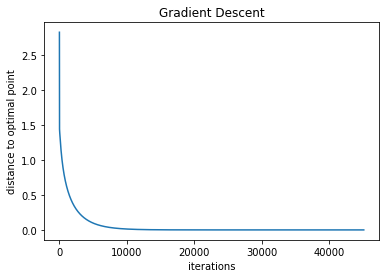

In [5]:
# 2. Implementing the gradient descent

# parameters and initial conditions
eta = 0.001
threshold = 10 ** -8
max_iteration = 1000000
X_init = np.array([-1.0, -1.0])
X_opt = np.array([1.0, 1.0])

# path of gradient descent
(X_vals,H_vals) = gradient_descent(X_init, X_opt, eta, threshold, max_iteration)

# plot distances to optimal point
plt.plot(range(len(X_vals)), [dist(X, X_opt) for X in X_vals] )

plt.ylabel("distance to optimal point")
plt.xlabel("iterations")
plt.title("Gradient Descent")

plt.show()

eta:  0.0001


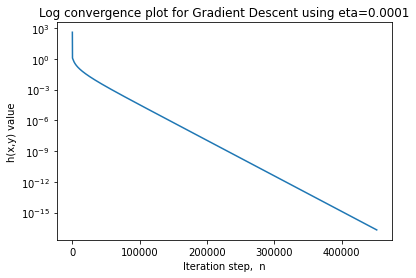

eta:  0.00031622776601683794


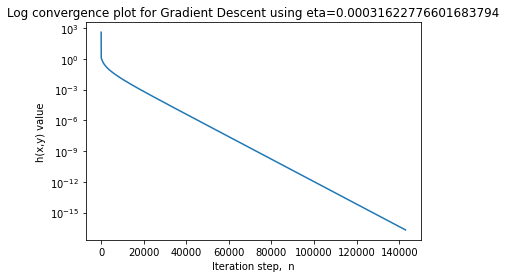

eta:  0.001


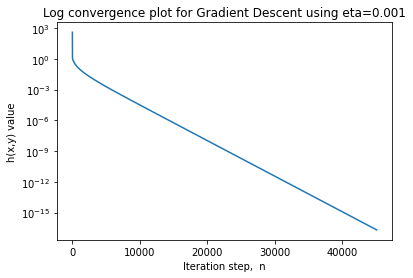

eta:  0.0031622776601683794
Does not converge for eta =  0.0031622776601683794


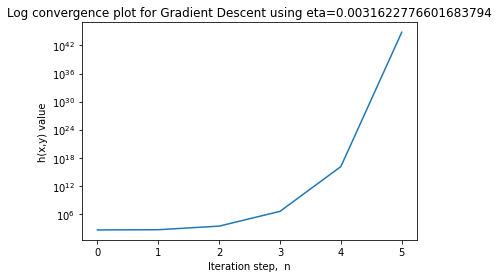

eta values used:  [0.0001     0.00031623 0.001      0.00316228]


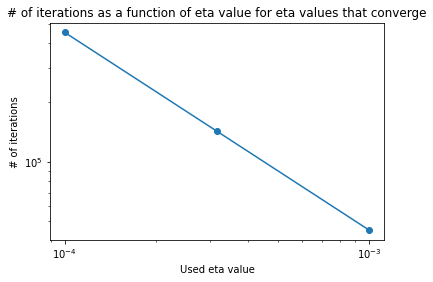

In [6]:
# 3. Trying out different values of eta
# Plotting number of iterations as a function of learning rate

etavalues = []
numiter = []
X_init = np.array([-1.0, -1.0])
X_opt = np.array([1.0, 1.0])
threshold = 10 ** -8
max_iteration = 1000000

#range of eta's
etapowers= np.arange(-4,-2,0.5,dtype=float)
etavalues=10**etapowers
trajectories = []
for eta in etavalues:
  print("eta: ", eta)
  X_init = np.array([-1.0, -1.0])
  (X_vals,H_vals) = gradient_descent(X_init, X_opt, eta, threshold, max_iteration)
  trajectories.append(X_vals)
  if H_vals[-1] > 10: 
      # Did not converge (value is greater than minimum point) 10 is an arbitrary value greater than min
    print("Does not converge for eta = ", eta)
  else: 
    numiter.append(len(X_vals))
  
  # 4. Convergence plots
  plt.plot(range(len(H_vals)),H_vals)
  plt.yscale("log")
  plt.ylabel("h(x,y) value")
  plt.xlabel("Iteration step,  n")
  plt.title("Log convergence plot for Gradient Descent using eta=" + str(eta))
  plt.show()

plt.plot(etavalues[:len(numiter)],numiter)
plt.scatter(etavalues[:len(numiter)],numiter)
plt.xscale("log")
plt.yscale("log")
print("eta values used: ", etavalues)
plt.ylabel("# of iterations")
plt.xlabel("Used eta value")
plt.title("# of iterations as a function of eta value for eta values that converge")
plt.show()


The algorithm seems to converge quicker for larger values of eta until the eta value is too large that it does not converge, for the values of eta considered the rate of convergence (# of iterations) scales linearly with eta.

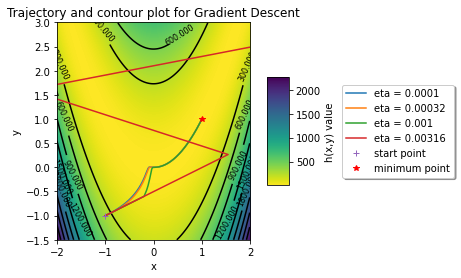

In [7]:
# 5. Trajectory on top of a contour plot for the previous convergence plot
fig, ax= plt.subplots()

Xplot = np.arange(-2, 2, 0.01)
Yplot = np.arange(-1.5, 3, 0.01)
Xplot, Yplot = np.meshgrid(Xplot, Yplot)
Zplot= h([Xplot,Yplot])
plt.xlim([-2, 2])
plt.ylim([-1.5, 3])
np.random.seed(1)

for i, X_vals in enumerate(trajectories):
  XYtrajectory = np.array(X_vals)
  ax.plot(XYtrajectory[:,0], XYtrajectory[:,1], label="eta = " + str(round(etavalues[i], 5)))

ax.plot(-1,-1,'+', label="start point") #start point
ax.plot(1,1,'*', label="minimum point", color="red") #end point

plt.imshow(Zplot, extent=[-2 ,2 , -1.5, 3], origin='lower',
            cmap='viridis_r')
contours = plt.contour(Xplot, Yplot, Zplot, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
fig.colorbar(surf, shrink=0.5, aspect=5, label="h(x,y) value")
plt.ylabel("y")
plt.xlabel("x")

plt.title("Trajectory and contour plot for Gradient Descent")
ax.legend(loc='center left', bbox_to_anchor=(1.45, 0.5), shadow=True)
plt.show()


Most eta values converge towards the optimal point. The eta value eta=0.00316 does not converge, and oscillates outward, as can be seen from the plot. 

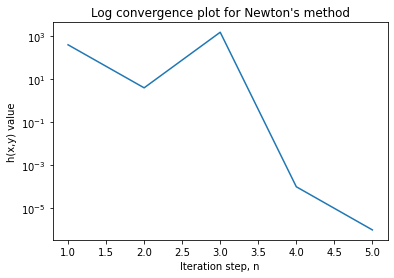

In [8]:
# 6. Implementing Newton's Method 

X_init = np.array([-1.0, -1.0])
X_opt = np.array([1.0, 1.0])
X = X_init
d=dist(X,X_opt)

H_vals_Newton=[]

X_visited_Newton = np.zeros((2, max_iteration))
distances_Newton = np.zeros(max_iteration)

def H_inv(X):
  x=X[0]
  y=X[1]
  dxdx_inv = (200)/(400+80000*x**2-80000*y)
  dxdy_inv = (400*x)/(400+80000*x**2-80000*y)
  dydy_inv = (2+1200*x**2-400*y)/(400+80000*x**2-80000*y)
  return np.array([[dxdx_inv, dxdy_inv], [dxdy_inv, dydy_inv]])

#values calculated using Mathematica

it = 0
threshold= 10**-8
distances_Newton[it] = d
X_visited_Newton[:,it] = X
while d > threshold and it < max_iteration:
    it += 1
    H_val_Newton = hval(X)
    H_vals_Newton.append(H_val_Newton)
    X -= np.dot(H_inv(X), gradient(X))
    d = dist(X, X_opt)
    distances_Newton[it] = d
    X_visited_Newton[:,it] = X

X_visited_Newton = X_visited_Newton[:,:it+1]
distances_Newton = distances_Newton[:it+1]

plt.plot(np.arange(1,it+1),H_vals_Newton)
plt.yscale("log")
plt.ylabel("h(x,y) value")
plt.xlabel("Iteration step, n")
plt.title("Log convergence plot for Newton's method")
plt.show()

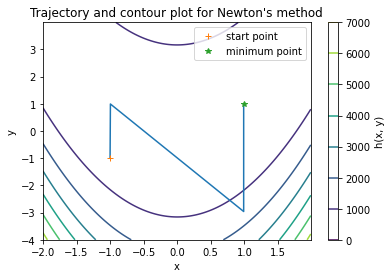

In [9]:
# 6 cont. Trajectory and contour plot for Newton's method

fig, ax = plt.subplots()

Xplot_newton = np.arange(-2, 2, 0.01)
Yplot_newton = np.arange(-4, 4, 0.01)
Xplot_newton, Yplot_newton = np.meshgrid(Xplot_newton, Yplot_newton)
Zplot_newton= h([Xplot_newton,Yplot_newton])

cont = ax.contour(Xplot_newton, Yplot_newton, Zplot_newton)
fig.colorbar(cont, label="h(x, y)")
ax.plot(X_visited_Newton[0,:], X_visited_Newton[1,:])
ax.plot(-1,-1,'+', label="start point") #start point
ax.plot(1,1,'*', label="minimum point") #end point
plt.ylabel("y")
plt.xlabel("x")
plt.title("Trajectory and contour plot for Newton's method")
plt.legend()
plt.show()

# 7. Discussion
Gradient descent will converge faster for higher eta values on our function h(x,y) until the eta value becomes too large. Then it does not converge. Gradient descent converges slowly because this function has a large flat "valley" near the minimum which provides small gradients in the valley. This causes slow updates. Newtons method converges much quicker because it uses the second derivative (hessian) as well as the gradient. This works particularly well for convex minima and functions with analytically easy to calculate hessians. 

The difference between the methods can be observed by comparing the contour plots as well: the contour plot for Newton's method has fewer and bigger jumps, whereas the gradient descent has a more gradual approach towards the optimal point. 